<a href="https://colab.research.google.com/github/harshbansal7/AQI-Analysis-SARIMAX/blob/main/Ensemble_Methods_for_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crop Yield Prediction based on DecisionTreeRegression

#### Importing all required libraries and CSV Dataset

In [12]:
import numpy as np
import pandas as pd # to make dataframes
import matplotlib.pyplot as plt # to visualize data (using plots)
import seaborn as sns # also for visualization
from sklearn import model_selection
from sklearn.model_selection import train_test_split # splitting data into test-train sections
from sklearn.tree import DecisionTreeRegressor # the actual Decision Maker
from sklearn import metrics # to calculate Accuracy of the Model

df = pd.read_csv('https://raw.githubusercontent.com/harshbansal7/profarm-dvh/main/Datasets%20and%20Notebooks/main2.csv') # importing dataset to a dataframe
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676425 entries, 0 to 676424
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             676425 non-null  object 
 1   District          676425 non-null  object 
 2   Crop              675458 non-null  object 
 3   Year              676425 non-null  object 
 4   Season            676425 non-null  object 
 5   Area              675458 non-null  float64
 6   Area Units        675458 non-null  object 
 7   Production        665684 non-null  float64
 8   Production Units  675458 non-null  object 
 9   Yield             675458 non-null  float64
dtypes: float64(3), object(7)
memory usage: 51.6+ MB


State                   35
District               709
Crop                    56
Year                    23
Season                   6
Area                 47390
Area Units               1
Production           67906
Production Units         3
Yield               193205
dtype: int64

#### Cleaning Data 

1. Removing Rows with any NaN entry.
2. Sorting data in Descending Order of Year for better understanding.
3. `Production, Production Units, Area, Area Units` colums were dropped.


In [13]:
df = df.dropna()

In [14]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665684 entries, 0 to 675507
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             665684 non-null  object 
 1   District          665684 non-null  object 
 2   Crop              665684 non-null  object 
 3   Year              665684 non-null  object 
 4   Season            665684 non-null  object 
 5   Area              665684 non-null  float64
 6   Area Units        665684 non-null  object 
 7   Production        665684 non-null  float64
 8   Production Units  665684 non-null  object 
 9   Yield             665684 non-null  float64
dtypes: float64(3), object(7)
memory usage: 55.9+ MB


State                   35
District               709
Crop                    56
Year                    23
Season                   6
Area                 47333
Area Units               1
Production           67906
Production Units         3
Yield               193205
dtype: int64

In [15]:
df['Season'] = pd.Categorical(df['Season'], ordered = True)
print (df['Season'].cat.categories)

Index(['Autumn', 'Kharif', 'Rabi', 'Summer', 'Whole Year', 'Winter'], dtype='object')


In [16]:
df = df.dropna()
df = df.sort_values(ascending=False, by='Year') 

df = df.drop('Area Units', axis=1)
df = df.drop('Production', axis=1)
df = df.drop('Production Units', axis=1)
df = df.drop('Area', axis=1)
df = df.drop('Year', axis=1)


# df = df[df['Year'].str.split('-').str[0].astype(int) >= 2010]

#### More Cleaning and handling String Entries (using Categories)

- Season cleaned up to remove disparities. 
- CSV Saved to have a Light Weight Dataset for quicker processing. 
- Converting `Year, State, Season, District, Crop` to Categorical Variables for better analysis.
- Printing Arrays of Categorical Entries for reference 

In [21]:
# df = df.replace({'Season':{'Autumn':'Kharif','Summer':'Zaid','Winter':'Rabi'}})

df.to_csv('yield_cleaned_2.csv')

# df['Year'] = pd.Categorical(df['Year'], ordered = True)
df['State'] = pd.Categorical(df['State'], ordered = True)
df['District'] = pd.Categorical(df['District'], ordered = True)
df['Season'] = pd.Categorical(df['Season'], ordered = True)
df['Crop'] = pd.Categorical(df['Crop'], ordered = True)

# print (df['Year'].cat.categories)
print (df['State'].cat.categories)
print (df['District'].cat.categories)
print (df['Season'].cat.categories)
print (df['Crop'].cat.categories)

df

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34],
           dtype='int64')
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            699, 700, 701, 702, 703, 704, 705, 706, 707, 708],
           dtype='int64', length=709)
Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55],
           dtype='int64')


,State,District,Crop,Season,Yield
287384,29,325,21,2,0.407208
621290,18,544,3,4,35.300000
285525,23,173,44,1,0.617691
285524,23,708,41,1,2.336540
621340,18,29,10,4,1.800008
...,...,...,...,...,...
659314,24,561,53,5,0.261665
659313,24,561,53,3,0.571429
659312,24,561,53,0,0.311966
333429,32,244,45,1,0.777778


#### Converting Categorical Columns to Integer Codes

In [22]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df.to_csv('yield_processing_1.csv')

df

,State,District,Crop,Season,Yield
287384,29,325,21,2,0.407208
621290,18,544,3,4,35.300000
285525,23,173,44,1,0.617691
285524,23,708,41,1,2.336540
621340,18,29,10,4,1.800008
...,...,...,...,...,...
659314,24,561,53,5,0.261665
659313,24,561,53,3,0.571429
659312,24,561,53,0,0.311966
333429,32,244,45,1,0.777778


In [23]:
df.nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665684 entries, 287384 to 321343
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   State     665684 non-null  int8   
 1   District  665684 non-null  int16  
 2   Crop      665684 non-null  int8   
 3   Season    665684 non-null  int8   
 4   Yield     665684 non-null  float64
dtypes: float64(1), int16(1), int8(3)
memory usage: 13.3 MB


#### Finally Dividing the Data into Two parts and doing the ML part

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def scores_print(name_of_regr, regr, x_test, y_test):
  y_pred = regr.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  print(name_of_regr + " MAE : {:.3f} | MSE : {:.3f} | R^2 Score : {:.5f}".format(mae, mse, r2))

In [25]:
X = df.drop(columns=['Yield'], axis=1)
Y = df['Yield']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state=42)
    
regr = DecisionTreeRegressor(random_state = 42) # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [49]:
len(X_test)

133137

In [26]:
scores_print('Decision Tree Regressor', regr, X_test, Y_test)

Decision Tree Regressor MAE : 21.019 | MSE : 91545.259 | R^2 Score : 0.89335


In [27]:
from sklearn.ensemble import BaggingRegressor

regr2 = BaggingRegressor(n_estimators=10, random_state=42)
regr2.fit(X_train, Y_train)

BaggingRegressor(random_state=42)

In [28]:
scores_print('Bagging Regression DT', regr2, X_test, Y_test)

Bagging Regression DT MAE : 21.135 | MSE : 92380.609 | R^2 Score : 0.89237


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=42)
r3 = KNeighborsRegressor()
r4 = DecisionTreeRegressor(max_depth = 10)

In [30]:
er = VotingRegressor([('rf', r2), ('r3', r3), ('dtr', r4)])
er.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=42)),
                            ('r3', KNeighborsRegressor()),
                            ('dtr', DecisionTreeRegressor(max_depth=10))])

In [31]:
r1.fit(X_train, Y_train)
scores_print('LinearRegression', r1, X_test, Y_test)

LinearRegression MAE : 211.058 | MSE : 831454.738 | R^2 Score : 0.03134


In [32]:
r2.fit(X_train, Y_train)
scores_print('RFR', r2, X_test, Y_test)

RFR MAE : 21.122 | MSE : 92332.393 | R^2 Score : 0.89243


In [33]:
r3.fit(X_train, Y_train)
scores_print('KNN', r3, X_test, Y_test)

KNN MAE : 23.346 | MSE : 109665.893 | R^2 Score : 0.87224


In [34]:
r4.fit(X_train, Y_train)
scores_print('DTR', r4, X_test, Y_test)

DTR MAE : 23.422 | MSE : 105582.813 | R^2 Score : 0.87699


In [35]:
scores_print('Voting Regressor', er, X_test, Y_test)

Voting Regressor MAE : 21.826 | MSE : 95816.419 | R^2 Score : 0.88837


In [36]:
regr.get_depth()

38

In [37]:
r5 = DecisionTreeRegressor(max_depth=10)
r5.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10)

In [38]:
scores_print('DT D =10', r5, X_test, Y_test)

DT D =10 MAE : 23.422 | MSE : 105582.813 | R^2 Score : 0.87699


In [39]:
from sklearn.ensemble import AdaBoostRegressor
dtr6 = DecisionTreeRegressor(max_depth=10)
adaregr = AdaBoostRegressor(base_estimator = dtr6, random_state=42, n_estimators=10)
adaregr.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  n_estimators=10, random_state=42)

In [40]:
scores_print('AdaBoostRegressor', adaregr, X_test, Y_test)

AdaBoostRegressor MAE : 25.461 | MSE : 114980.209 | R^2 Score : 0.86605


In [41]:
from sklearn.ensemble import BaggingRegressor

bag_regr = BaggingRegressor(base_estimator = r4, n_estimators=10, random_state=42)
bag_regr.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                 random_state=42)

In [42]:
scores_print('Bagging Regressor with DT 10 Depth', bag_regr, X_test, Y_test)

Bagging Regressor with DT 10 Depth MAE : 22.621 | MSE : 98947.131 | R^2 Score : 0.88472


In [43]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('dtr', r5),
    ('bag', bag_regr),
    ('adab', adaregr),
]
sregr = StackingRegressor(estimators, final_estimator=dtr6)
sregr.fit(X_train, Y_train)


StackingRegressor(estimators=[('dtr', DecisionTreeRegressor(max_depth=10)),
                              ('bag',
                               BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                                                random_state=42)),
                              ('adab',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                                                 n_estimators=10,
                                                 random_state=42))],
                  final_estimator=DecisionTreeRegressor(max_depth=10))

In [44]:
scores_print('Stacking Regressor', sregr, X_test, Y_test)

Stacking Regressor MAE : 23.170 | MSE : 103743.734 | R^2 Score : 0.87914


In [72]:
estimators2 = [
    ('bag', bag_regr),
    ('adab', adaregr),
]
dtr7 = DecisionTreeRegressor(max_depth=10)
sregr2 = StackingRegressor(estimators2, final_estimator=dtr7)
sregr2.fit(X_train, Y_train)

StackingRegressor(estimators=[('bag',
                               BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                                                random_state=42)),
                              ('adab',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                                                 n_estimators=10,
                                                 random_state=42))],
                  final_estimator=DecisionTreeRegressor(max_depth=10))

In [73]:
scores_print('Stacking Regressor without DT Training', sregr2, X_train, Y_train)
scores_print('Stacking Regressor without DT', sregr2, X_test, Y_test)

Stacking Regressor without DT Training MAE : 22.008 | MSE : 99960.446 | R^2 Score : 0.88575
Stacking Regressor without DT MAE : 23.397 | MSE : 105804.289 | R^2 Score : 0.87674


In [68]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for i in range(20):
    rn = DecisionTreeRegressor(max_depth=i+1)
    rn.fit(X_train, Y_train)
    y_pred = rn.predict(X_test)
    y_train_pred = rn.predict(X_train)
    r2 = r2_score(Y_test, y_pred)
    r2_train = r2_score(Y_train, y_train_pred)
    train_scores.append(r2_train)
    test_scores.append(r2)


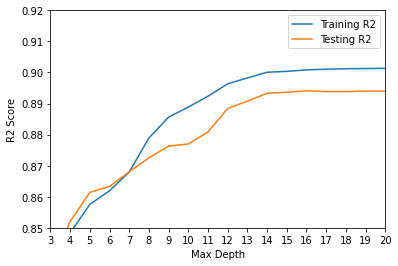

In [69]:
plt.plot(range(1, 21), train_scores, label='Training R2')
plt.plot(range(1, 21), test_scores, label='Testing R2')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.xticks(range(1, 21, 1))
plt.xlim(3, 20)  # Set y-axis limits
plt.ylim(0.85, 0.92)  # Set y-axis limits
plt.show()

In [79]:
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

estimators2 = [
  ('bag', bag_regr),
  ('adab', adaregr),
]

for i in range(10):
  dtr7 = DecisionTreeRegressor(max_depth=i+1)
  sregr2 = StackingRegressor(estimators2, final_estimator=dtr7)
  sregr2.fit(X_train, Y_train)
  y_pred = sregr2.predict(X_test)
  y_train_pred = sregr2.predict(X_train)
  r2 = r2_score(Y_test, y_pred)
  r2_train = r2_score(Y_train, y_train_pred)
  train_scores.append(r2_train)
  test_scores.append(r2)

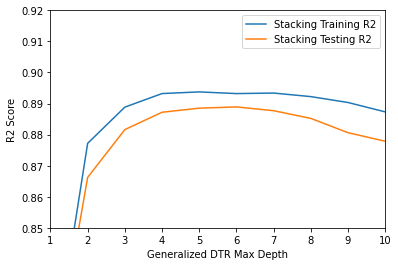

In [82]:
plt.plot(range(1, 11), train_scores, label='Stacking Training R2')
plt.plot(range(1, 11), test_scores, label='Stacking Testing R2')
plt.xlabel('Generalized DTR Max Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.xticks(range(1, 11, 1))
plt.xlim(1, 10)  # Set y-axis limits
plt.ylim(0.85, 0.92)  # Set y-axis limits
plt.show()